In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
np.set_printoptions(suppress=True, precision=3)

s = np.random.rand(50) * 300 + 5
s.sort()
s = s[::-1]
print(s)

w = s[[41, 47]]
print(w)

[293.932 293.89  292.672 291.416 290.124 283.093 270.608 269.565 267.036
 264.151 259.397 253.25  239.55  237.356 231.468 229.108 204.719 201.718
 198.969 191.976 180.866 180.3   172.655 154.997 150.75  140.945 127.643
 126.326 121.983 114.808  99.37   95.69   93.958  87.193  86.251  79.232
  71.519  69.262  60.307  54.255  44.416  43.888  37.571  36.486  33.225
  26.008  24.45   21.162  20.622  11.825]
[43.888 21.162]


In [4]:
cld = s[0:5].reshape(-1, 1) - w.reshape(1, -1)
print(cld)

[[250.045 272.77 ]
 [250.002 272.727]
 [248.785 271.51 ]
 [247.528 270.254]
 [246.237 268.962]]


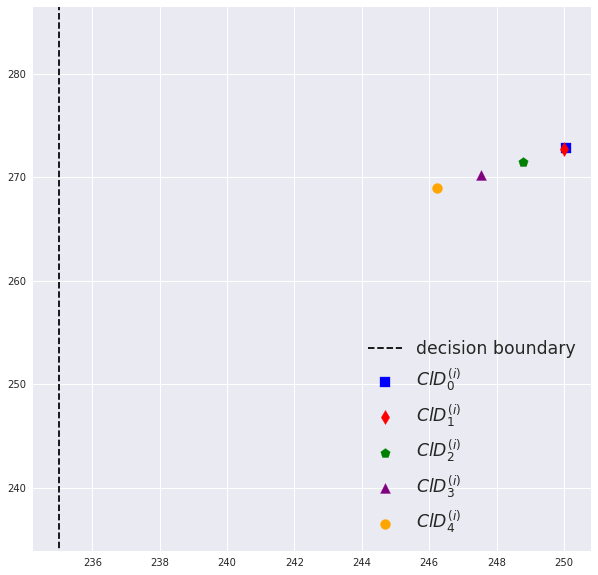

In [5]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 10)

markers=['s', 'd', 'p', '^', 'o']
colors=['blue', 'red', 'green', 'purple', 'orange']

for i in range(5):
    ax.scatter(cld[i, 0], cld[i, 1], s=100, marker=markers[i], color=colors[i], label='$ClD_{0:d}^{1:s}$'.format(i, '{(i)}'))

x = [235]*1000
y = np.linspace(cld.min()*0.8, cld.max()*1.2, 1000)
               
ax.plot(x,y,'--', color='black', label='decision boundary')

ax.set_ylim(bottom=cld.min()*0.95, top=cld.max()*1.05)

    
plt.legend(**dict(fontsize='xx-large'))

In [6]:
cm = np.load('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-coll_matches/cm.v2/unicamp/unicamp.004.resnetv2-L2_db_matches.npy')
cs = np.load('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-coll_matches/cm.v2/unicamp/unicamp.004.resnetv2-L2_db_scores.npy')

[1056 1053 1057 1046 1049 1048 1045 1047 1043 1041]
(3143, 300)
0.0 178.4138
[  0.      2.788   5.575   8.363  11.151  13.939  16.726  19.514  22.302
  25.089  27.877  30.665  33.453  36.24   39.028  41.816  44.603  47.391
  50.179  52.967  55.754  58.542  61.33   64.117  66.905  69.693  72.481
  75.268  78.056  80.844  83.631  86.419  89.207  91.995  94.782  97.57
 100.358 103.145 105.933 108.721 111.509 114.296 117.084 119.872 122.659
 125.447 128.235 131.023 133.81  136.598 139.386 142.173 144.961 147.749
 150.537 153.324 156.112 158.9   161.688 164.475 167.263 170.051 172.838
 175.626 178.414] (65,)


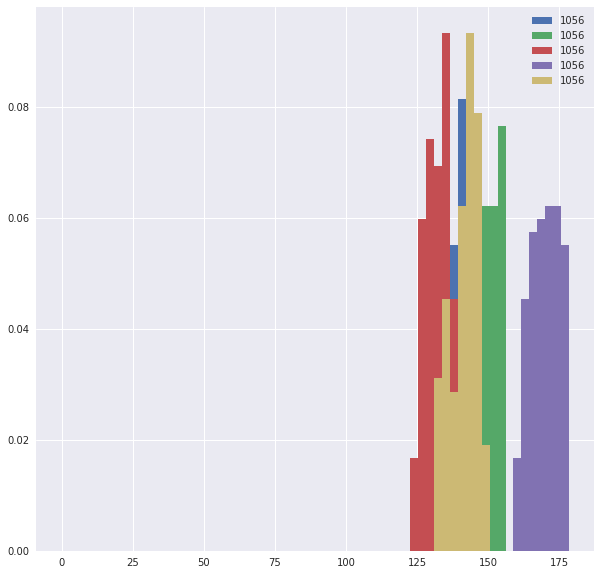

In [18]:
i = 1056
p = 150
print(cm[i, 0:10])
print(cm.shape)

idx = cm[i, 0:5]

mi = cs[idx].min()
ma = cs[idx].max()
print(mi, ma)

delta = (ma - mi)/64
edges = np.arange(mi, ma+1, delta)
print(edges, edges.shape)

#r = np.random.choice(np.arange(0, cs.shape[0]), 5, replace=False)

fig, ax = plt.subplots(1)
fig.set_size_inches(10, 10)

plt.hist(cs[idx[0], p:], bins=edges, density=True, label="{0:d}".format(idx[0]))
plt.hist(cs[idx[1], p:], bins=edges, density=True, label="{0:d}".format(idx[0]))
plt.hist(cs[idx[2], p:], bins=edges, density=True, label="{0:d}".format(idx[0]))
plt.hist(cs[idx[3], p:], bins=edges, density=True, label="{0:d}".format(idx[0]))
plt.hist(cs[idx[4], p:], bins=edges, density=True, label="{0:d}".format(idx[0]))

plt.legend()